In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from wordcloud import WordCloud
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [3]:
data = pd.read_csv('IPL_salary_new_final_data.csv')

<AxesSubplot:>

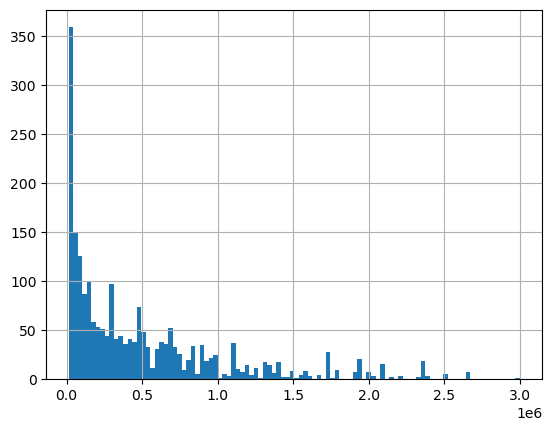

In [4]:
data.Price.hist(bins=100)

In [5]:
print(data.columns.values)

['Name2' 'Season' 'Season_num' 'PrevSeason_num' 'Cum_code' 'Team' 'Key'
 'Type' 'Nationality' 'Overseas_player' 'WK' 'Star_player' 'Active_T20I'
 'Price' 'Cum_LY_bat_I' 'Cum_LY_bat_R' 'Cum_LY_bat_B' 'Cum_LY_bat_Outs'
 'Cum_LY_bat_Avg' 'Cum_LY_bat_SR' 'Cum_LY_bat_4s' 'Cum_LY_bat_6s'
 'Cum_LY_bat_30plus' 'Cum_LY_bat_50plus' 'Cum_LY_bat_100plus'
 'Cum_LY_bowl_I' 'Cum_LY_bowl_B' 'Cum_LY_bowl_R' 'Cum_LY_bowl_W'
 'Cum_LY_bowl_Econ' 'Cum_LY_bowl_Avg' 'Cum_LY_bowl_SR' 'Cum_LY_bowl_4W'
 'Cum_LY_bowl_5W' 'Cum_LY_bowl_4s' 'Cum_LY_bowl_6s' 'Cum_LY_bowl_Dots'
 'Cum_LY_Bat_I' 'Cum_LY_HardHitter' 'Cum_LY_Finisher%' 'Cum_LY_46_scored'
 'Cum_LY_Bat_avg' 'Cum_LY_50plus_scored' 'Cum_LY_RBW' 'Cum_LY_Bowl_I'
 'Cum_LY_Bowl_Econ' 'Cum_LY_Bowl_Avg' 'Cum_LY_Bowl _SR' 'Cum_LY_BW Taker'
 'Cum_LY_bowl_46_conc' 'Cum_LY_bowl_Dots%' 'Cum_IPL_agg_bat_I'
 'Cum_IPL_agg_bat_R' 'Cum_IPL_agg_bat_B' 'Cum_IPL_agg_bat_Outs'
 'Cum_IPL_agg_bat_Avg' 'Cum_IPL_agg_bat_SR' 'Cum_IPL_agg_bat_4s'
 'Cum_IPL_agg_bat_6s' 'Cum_IPL_agg_ba

In [6]:
data.head()

,Name2,Season,Season_num,PrevSeason_num,Cum_code,Team,Key,Type,Nationality,Overseas_player,...,Weighted_LY_bat_Bat_avg,Weighted_LY_bat_50plus_scored,Weighted_LY_bat_RBW,Weighted_LY_bowl_Bowl_I,Weighted_LY_bowl_Bowl_Econ,Weighted_LY_bowl_Bowl_Avg,Weighted_LY_bowl_Bowl _SR,Weighted_LY_bowl_BW Taker,Weighted_LY_bowl_46_conc,Weighted_LY_bowl_Dots%
0,A Flintoff,2009,2,1,cum1,Chennai Super Kings,NaN,AR,O,1,...,0.000000,0.000000,0.000000,42,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,GJ Bailey,2009,2,1,cum1,Chennai Super Kings,NaN,Bat,O,1,...,0.000000,0.000000,0.000000,42,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,JA Morkel,2009,2,1,cum1,Chennai Super Kings,NaN,AR,O,1,...,8.033333,0.033333,0.625000,42,8.012903,24.352941,18.235294,0.025641,0.158065,0.322581
3,JDP Oram,2009,2,1,cum1,Chennai Super Kings,NaN,AR,O,1,...,3.000000,0.000000,0.727273,42,8.940000,49.666667,33.333333,0.000000,0.220000,0.320000
4,Joginder Sharma,2009,2,1,cum1,Chennai Super Kings,NaN,Bowl,I,0,...,2.666667,0.000000,0.666667,42,9.151899,30.125000,19.750000,0.000000,0.189873,0.272152


In [7]:
# Count the number of empty rows
data.Name2.isna().sum()

0

In [8]:
no_perf_players = (data.Cum_LY_bat_I == 0) & (data.Cum_LY_bowl_I == 0) & (data.Cum_IPL_agg_bat_I == 0) & (data.Cum_IPL_agg_bowl_I == 0)

In [9]:
len(data.Name2[no_perf_players])

277

In [10]:
len(data.Name2)

2185

In [11]:
data.Type.value_counts()

Bowl    763
AR      686
Bat     519
WK      217
Name: Type, dtype: int64

In [12]:
df = data[~no_perf_players]

In [13]:
print(df.Type.value_counts())
print(df.Nationality.value_counts())
print(df.Star_player.value_counts())

Bowl    665
AR      589
Bat     463
WK      191
Name: Type, dtype: int64
I    1122
O     786
Name: Nationality, dtype: int64
1    1219
0     689
Name: Star_player, dtype: int64


In [14]:
df.Price = df.Price * (1 / 10**6) #salary in millions

D:\Anaconda\envs\dlgpu\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [15]:
#Derived Metrics Only

df1 = df.iloc[:, [0,2] + list(range(7,14)) + list(range(37,51)) + list(range(74,88))]
print(df1.columns)

Index(['Name2', 'Season_num', 'Type', 'Nationality', 'Overseas_player', 'WK',
       'Star_player', 'Active_T20I', 'Price', 'Cum_LY_Bat_I',
       'Cum_LY_HardHitter', 'Cum_LY_Finisher%', 'Cum_LY_46_scored',
       'Cum_LY_Bat_avg', 'Cum_LY_50plus_scored', 'Cum_LY_RBW', 'Cum_LY_Bowl_I',
       'Cum_LY_Bowl_Econ', 'Cum_LY_Bowl_Avg', 'Cum_LY_Bowl _SR',
       'Cum_LY_BW Taker', 'Cum_LY_bowl_46_conc', 'Cum_LY_bowl_Dots%',
       'Cum_IPL_bat_DM_Bat_I', 'Cum_IPL_bat_DM_HardHitter',
       'Cum_IPL_bat_DM_Finisher%', 'Cum_IPL_bat_DM_46_scored',
       'Cum_IPL_bat_DM_Bat_avg', 'Cum_IPL_bat_DM_50plus_scored',
       'Cum_IPL_bat_DM_RBW', 'Cum_IPL_bowl_DM_Bowl_I',
       'Cum_IPL_bowl_DM_Bowl_Econ', 'Cum_IPL_bowl_DM_Bowl_Avg',
       'Cum_IPL_bowl_DM_Bowl _SR', 'Cum_IPL_bowl_DM_BW Taker',
       'Cum_IPL_bowl_DM_46_conc', 'Cum_IPL_bowl_DM_Dots%'],
      dtype='object')


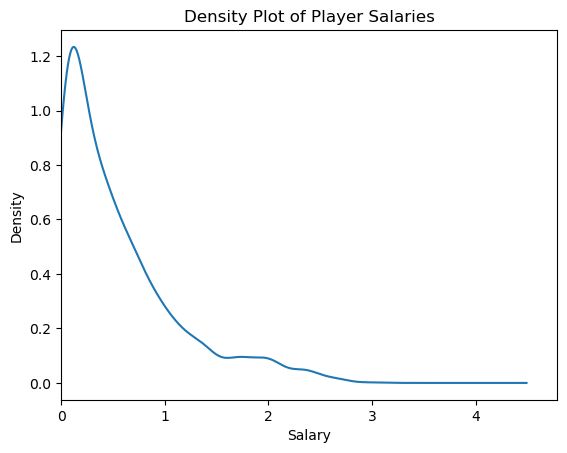

In [16]:
ax = df1.Price.plot(kind='density')
ax.set_xlim(0)
# Set plot title and axis labels
plt.title('Density Plot of Player Salaries')
plt.xlabel('Salary')
plt.ylabel('Density')
# Show the plot
plt.show()

In [17]:
df_bat = df1[(df1.Type == 'Bat') | (df1.Type == 'WK')]

In [18]:
print(len(df_bat.Name2))
print(df_bat.Nationality.value_counts())
print(df_bat.Star_player.value_counts())

654
I    390
O    264
Name: Nationality, dtype: int64
1    462
0    192
Name: Star_player, dtype: int64


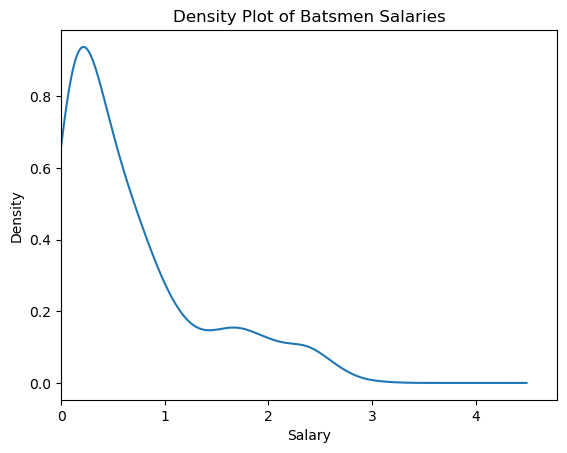

In [19]:
ax = df_bat.Price.plot(kind='density')
ax.set_xlim(0)
# Set plot title and axis labels
plt.title('Density Plot of Batsmen Salaries')
plt.xlabel('Salary')
plt.ylabel('Density')
# Show the plot
plt.show()

In [20]:
df_bowl = df1[(df1.Type == 'Bowl')]

In [21]:
print(df_bowl.Nationality.value_counts())
print(df_bowl.Star_player.value_counts())

I    443
O    222
Name: Nationality, dtype: int64
1    352
0    313
Name: Star_player, dtype: int64


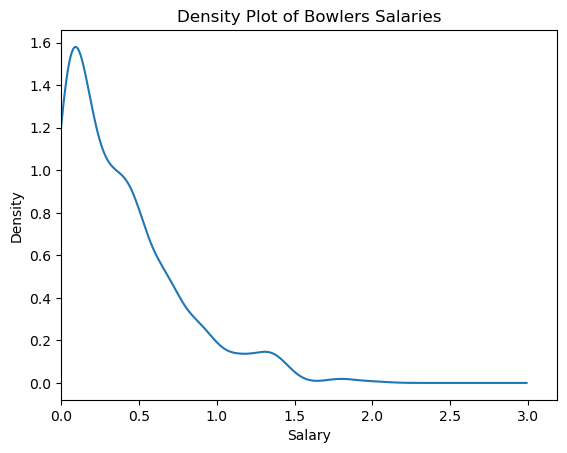

In [22]:
ax = df_bowl.Price.plot(kind='density')
ax.set_xlim(0)
# Set plot title and axis labels
plt.title('Density Plot of Bowlers Salaries')
plt.xlabel('Salary')
plt.ylabel('Density')
# Show the plot
plt.show()

In [23]:
df_AR = df1[(df1.Type == 'AR')]

In [24]:
print(df_AR.Nationality.value_counts())
print(df_AR.Star_player.value_counts())

O    300
I    289
Name: Nationality, dtype: int64
1    405
0    184
Name: Star_player, dtype: int64


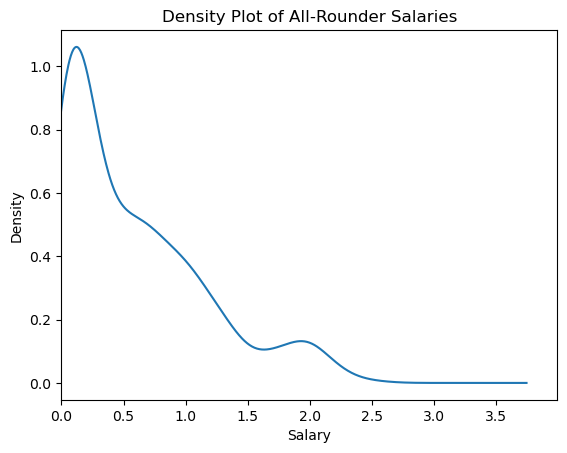

In [25]:
ax = df_AR.Price.plot(kind='density')
ax.set_xlim(0)
# Set plot title and axis labels
plt.title('Density Plot of All-Rounder Salaries')
plt.xlabel('Salary')
plt.ylabel('Density')
# Show the plot
plt.show()

Text(0.5, 0.98, 'Density Plots of Player Prices')

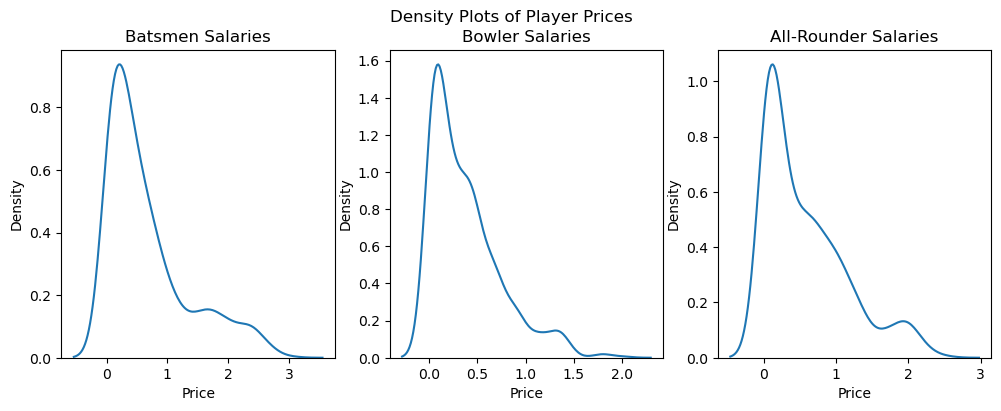

In [26]:
import seaborn as sns

# create a figure with subplots for each dataframe
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

# plot the density plot for each dataframeWordCloudwn subplot
sns.kdeplot(data=df_bat, x='Price', ax=axes[0])
sns.kdeplot(data=df_bowl, x='Price', ax=axes[1])
sns.kdeplot(data=df_AR, x='Price', ax=axes[2])

# set the titles for each subplot
axes[0].set_title('Batsmen Salaries')
axes[1].set_title('Bowler Salaries')
axes[2].set_title('All-Rounder Salaries')

# set the overall title for the figure
fig.suptitle('Density Plots of Player Prices')


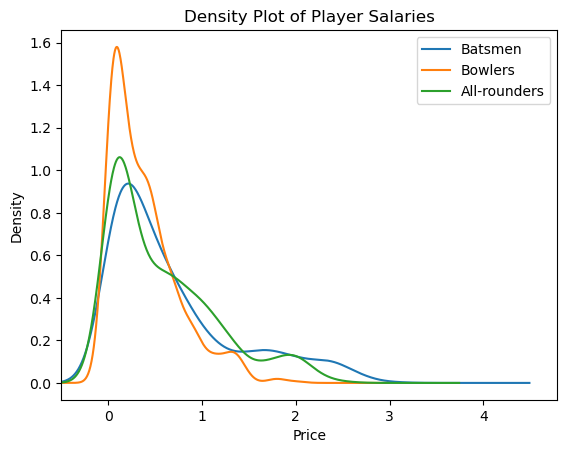

In [27]:
# plot the density curves
df_bat['Price'].plot(kind='density')
df_bowl['Price'].plot(kind='density')
df_AR['Price'].plot(kind='density')

# add legend and axis labels
plt.legend(['Batsmen', 'Bowlers', 'All-rounders'])
plt.xlabel('Price')
plt.ylabel('Density')
plt.xlim(-0.5)
plt.title("Density Plot of Player Salaries")

# show the plot
#plt.show()
plt.savefig('salary_density_plot.png')

In [28]:
df1.columns

Index(['Name2', 'Season_num', 'Type', 'Nationality', 'Overseas_player', 'WK',
       'Star_player', 'Active_T20I', 'Price', 'Cum_LY_Bat_I',
       'Cum_LY_HardHitter', 'Cum_LY_Finisher%', 'Cum_LY_46_scored',
       'Cum_LY_Bat_avg', 'Cum_LY_50plus_scored', 'Cum_LY_RBW', 'Cum_LY_Bowl_I',
       'Cum_LY_Bowl_Econ', 'Cum_LY_Bowl_Avg', 'Cum_LY_Bowl _SR',
       'Cum_LY_BW Taker', 'Cum_LY_bowl_46_conc', 'Cum_LY_bowl_Dots%',
       'Cum_IPL_bat_DM_Bat_I', 'Cum_IPL_bat_DM_HardHitter',
       'Cum_IPL_bat_DM_Finisher%', 'Cum_IPL_bat_DM_46_scored',
       'Cum_IPL_bat_DM_Bat_avg', 'Cum_IPL_bat_DM_50plus_scored',
       'Cum_IPL_bat_DM_RBW', 'Cum_IPL_bowl_DM_Bowl_I',
       'Cum_IPL_bowl_DM_Bowl_Econ', 'Cum_IPL_bowl_DM_Bowl_Avg',
       'Cum_IPL_bowl_DM_Bowl _SR', 'Cum_IPL_bowl_DM_BW Taker',
       'Cum_IPL_bowl_DM_46_conc', 'Cum_IPL_bowl_DM_Dots%'],
      dtype='object')

In [29]:
!pip install fitter

Fitting 10 distributions: 100%|████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 18.17it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
exponpow,15.895916,319.859001,-2108.547081,inf,0.059346,3.028798e-02
chi2,16.724994,325.312014,-2078.601132,inf,0.075951,2.114238e-03
powerlaw,18.120480,240.639535,-2031.399555,inf,0.181712,1.720350e-17
gamma,19.544266,406.085191,-1986.848077,inf,0.169465,2.949144e-15
lognorm,20.498025,363.932100,-1958.784224,inf,0.127414,8.539789e-09


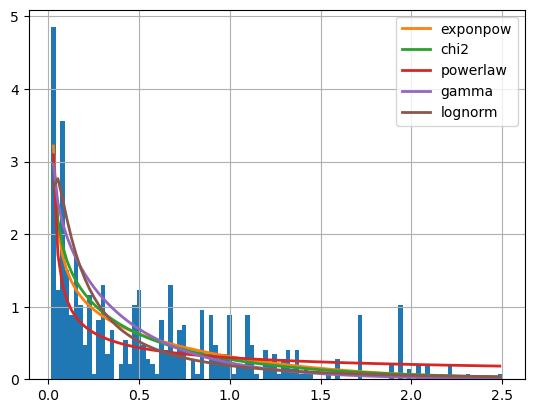

In [30]:
from fitter import Fitter, get_common_distributions, get_distributions

f = Fitter(df_AR.Price,
           distributions=get_common_distributions())
f.fit()
f.summary()

In [46]:
df2 = df1.copy()
df2 = df2.iloc[:, 4:]
df2.columns

Index(['Overseas_player', 'WK', 'Star_player', 'Active_T20I', 'Price',
       'Cum_LY_Bat_I', 'Cum_LY_HardHitter', 'Cum_LY_Finisher%',
       'Cum_LY_46_scored', 'Cum_LY_Bat_avg', 'Cum_LY_50plus_scored',
       'Cum_LY_RBW', 'Cum_LY_Bowl_I', 'Cum_LY_Bowl_Econ', 'Cum_LY_Bowl_Avg',
       'Cum_LY_Bowl _SR', 'Cum_LY_BW Taker', 'Cum_LY_bowl_46_conc',
       'Cum_LY_bowl_Dots%', 'Cum_IPL_bat_DM_Bat_I',
       'Cum_IPL_bat_DM_HardHitter', 'Cum_IPL_bat_DM_Finisher%',
       'Cum_IPL_bat_DM_46_scored', 'Cum_IPL_bat_DM_Bat_avg',
       'Cum_IPL_bat_DM_50plus_scored', 'Cum_IPL_bat_DM_RBW',
       'Cum_IPL_bowl_DM_Bowl_I', 'Cum_IPL_bowl_DM_Bowl_Econ',
       'Cum_IPL_bowl_DM_Bowl_Avg', 'Cum_IPL_bowl_DM_Bowl _SR',
       'Cum_IPL_bowl_DM_BW Taker', 'Cum_IPL_bowl_DM_46_conc',
       'Cum_IPL_bowl_DM_Dots%'],
      dtype='object')

In [47]:
cols_to_scale = df2.iloc[:, 5:33] # select columns 5 to 32
scaler = StandardScaler() # instantiate a StandardScaler object
scaled_cols = scaler.fit_transform(cols_to_scale) # center and scale the selected columns
df2.iloc[:, 5:33] = scaled_cols # replace the original columns with the scaled values

In [43]:
df2.head()

,Overseas_player,WK,Star_player,Active_T20I,Price,Cum_LY_Bat_I,Cum_LY_HardHitter,Cum_LY_Finisher%,Cum_LY_46_scored,Cum_LY_Bat_avg,...,Cum_IPL_bat_DM_Bat_avg,Cum_IPL_bat_DM_50plus_scored,Cum_IPL_bat_DM_RBW,Cum_IPL_bowl_DM_Bowl_I,Cum_IPL_bowl_DM_Bowl_Econ,Cum_IPL_bowl_DM_Bowl_Avg,Cum_IPL_bowl_DM_Bowl _SR,Cum_IPL_bowl_DM_BW Taker,Cum_IPL_bowl_DM_46_conc,Cum_IPL_bowl_DM_Dots%
2,1,0,1,0,0.675,-0.011159,0.773420,0.143826,0.796623,0.946511,...,-1.088654,-0.575524,-1.537093,-0.635532,-1.126141,-0.84846,-0.892971,-0.392929,-1.009777,-1.106764
3,1,0,1,0,0.675,-0.854358,0.351740,0.874781,0.698041,-0.074145,...,-1.088654,-0.575524,-1.537093,-0.635532,-1.126141,-0.84846,-0.892971,-0.392929,-1.009777,-1.106764
4,0,0,0,0,0.225,-0.854358,0.673751,-0.952607,0.836171,-0.695413,...,-1.088654,-0.575524,-1.537093,-0.635532,-1.126141,-0.84846,-0.892971,-0.392929,-1.009777,-1.106764
5,1,0,1,0,0.600,-0.959757,-1.419317,-0.952607,-2.036936,-1.192428,...,-1.088654,-0.575524,-1.537093,-0.635532,-1.126141,-0.84846,-0.892971,-0.392929,-1.009777,-1.106764
6,1,0,1,0,0.375,-0.643558,1.138877,-0.038913,0.728430,2.721564,...,-1.088654,-0.575524,-1.537093,-0.635532,-1.126141,-0.84846,-0.892971,-0.392929,-1.009777,-1.106764


In [48]:
# Specify the number of clusters
num_clusters = 4

# Instantiate the k-means model
kmeans = KMeans(n_clusters=num_clusters)

# Fit the k-means model to the data
kmeans.fit(df2)

# Get the cluster labels
labels = kmeans.labels_


# Add the cluster labels to the dataset
df2['cluster'] = labels

# Print the number of data points in each cluster
print(df2['cluster'].value_counts())

df2['Name'] = df1['Name2']

0    557
1    468
3    449
2    434
Name: cluster, dtype: int64


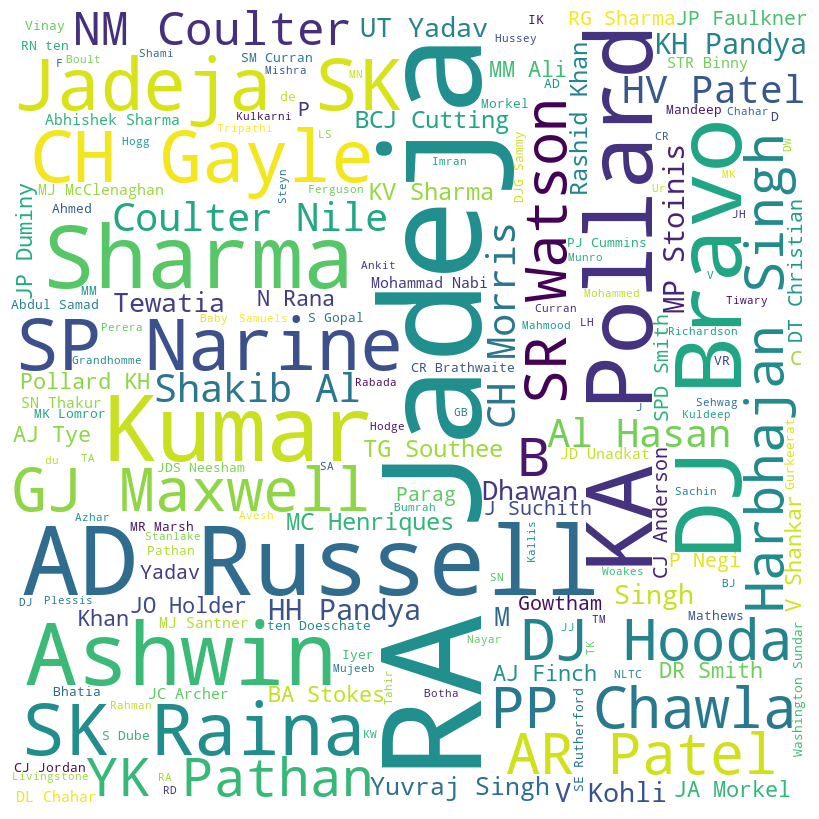

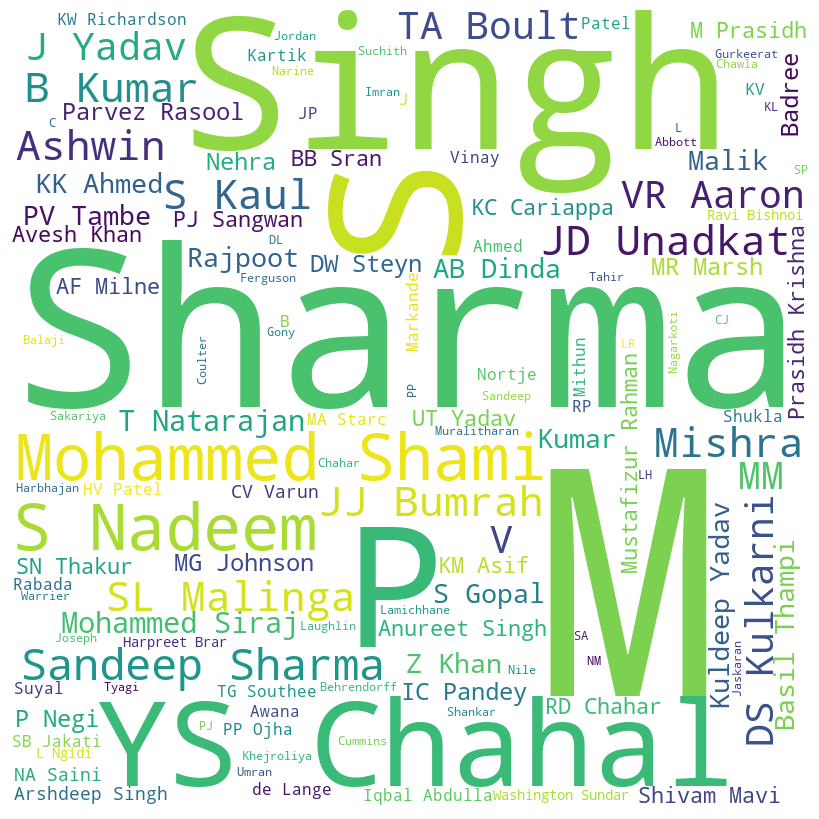

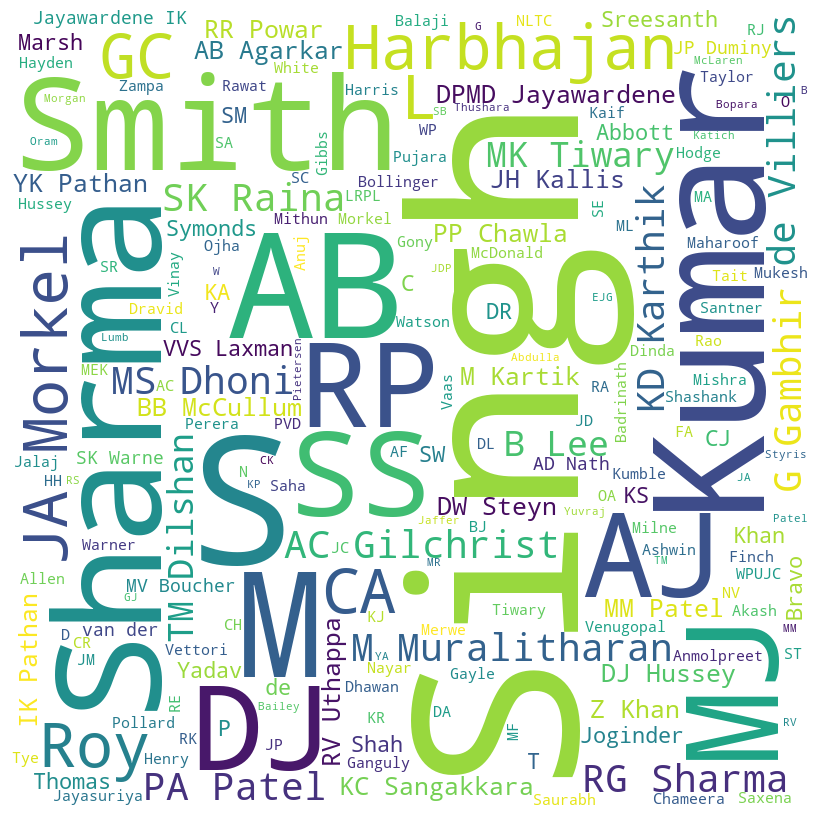

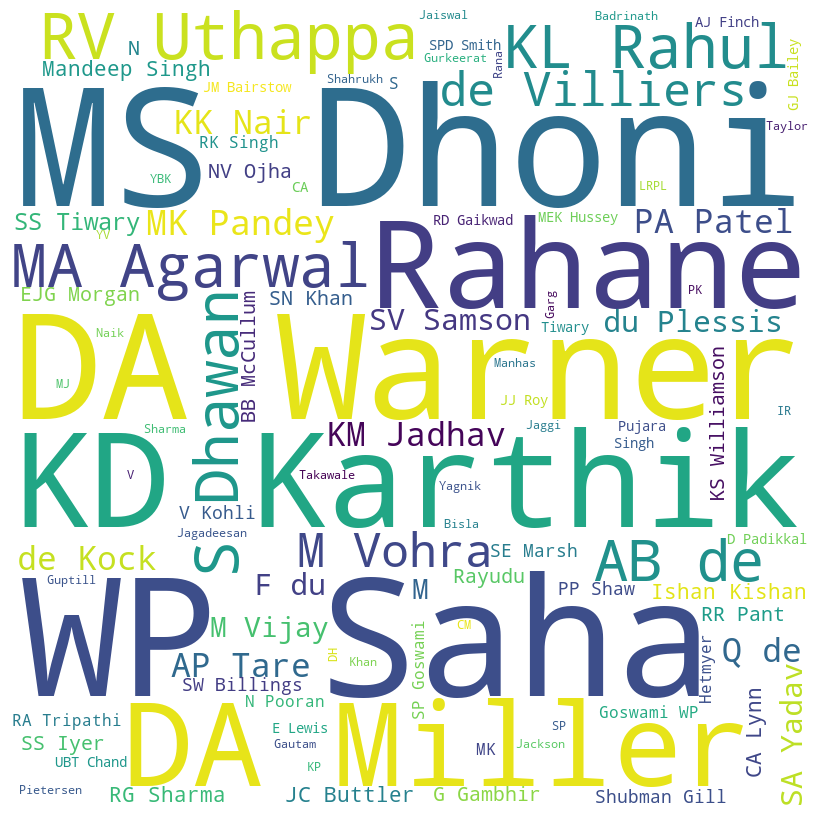

In [49]:
# Group the text column by the cluster labels
grouped_text = df2.groupby('cluster')['Name'].apply(lambda x: ' '.join(x))

# Create a WordCloud object for each cluster and plot the resulting word cloud
for i in range(len(grouped_text)):
    wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate(grouped_text.iloc[i])
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.show()
    filename = f'wordcloud_{i}.png'
    wordcloud.to_file(filename)

In [154]:
# save the DataFrame to a CSV file
df2.to_csv('cluster_output.csv', index=False)

In [50]:
df_bowl.columns

Index(['Name2', 'Season_num', 'Type', 'Nationality', 'Overseas_player', 'WK',
       'Star_player', 'Active_T20I', 'Price', 'Cum_LY_Bat_I',
       'Cum_LY_HardHitter', 'Cum_LY_Finisher%', 'Cum_LY_46_scored',
       'Cum_LY_Bat_avg', 'Cum_LY_50plus_scored', 'Cum_LY_RBW', 'Cum_LY_Bowl_I',
       'Cum_LY_Bowl_Econ', 'Cum_LY_Bowl_Avg', 'Cum_LY_Bowl _SR',
       'Cum_LY_BW Taker', 'Cum_LY_bowl_46_conc', 'Cum_LY_bowl_Dots%',
       'Cum_IPL_bat_DM_Bat_I', 'Cum_IPL_bat_DM_HardHitter',
       'Cum_IPL_bat_DM_Finisher%', 'Cum_IPL_bat_DM_46_scored',
       'Cum_IPL_bat_DM_Bat_avg', 'Cum_IPL_bat_DM_50plus_scored',
       'Cum_IPL_bat_DM_RBW', 'Cum_IPL_bowl_DM_Bowl_I',
       'Cum_IPL_bowl_DM_Bowl_Econ', 'Cum_IPL_bowl_DM_Bowl_Avg',
       'Cum_IPL_bowl_DM_Bowl _SR', 'Cum_IPL_bowl_DM_BW Taker',
       'Cum_IPL_bowl_DM_46_conc', 'Cum_IPL_bowl_DM_Dots%'],
      dtype='object')

In [51]:
df_bat1 = df_bat.iloc[:, [0,1] + list(range(4,16)) + list(range(23,30))]
df_bat1.columns

Index(['Name2', 'Season_num', 'Overseas_player', 'WK', 'Star_player',
       'Active_T20I', 'Price', 'Cum_LY_Bat_I', 'Cum_LY_HardHitter',
       'Cum_LY_Finisher%', 'Cum_LY_46_scored', 'Cum_LY_Bat_avg',
       'Cum_LY_50plus_scored', 'Cum_LY_RBW', 'Cum_IPL_bat_DM_Bat_I',
       'Cum_IPL_bat_DM_HardHitter', 'Cum_IPL_bat_DM_Finisher%',
       'Cum_IPL_bat_DM_46_scored', 'Cum_IPL_bat_DM_Bat_avg',
       'Cum_IPL_bat_DM_50plus_scored', 'Cum_IPL_bat_DM_RBW'],
      dtype='object')

In [52]:
df_bowl1 = df_bowl.iloc[:, [0,1,4,6,7,8] + list(range(16,23)) + list(range(30,37))]
df_bowl1.columns

Index(['Name2', 'Season_num', 'Overseas_player', 'Star_player', 'Active_T20I',
       'Price', 'Cum_LY_Bowl_I', 'Cum_LY_Bowl_Econ', 'Cum_LY_Bowl_Avg',
       'Cum_LY_Bowl _SR', 'Cum_LY_BW Taker', 'Cum_LY_bowl_46_conc',
       'Cum_LY_bowl_Dots%', 'Cum_IPL_bowl_DM_Bowl_I',
       'Cum_IPL_bowl_DM_Bowl_Econ', 'Cum_IPL_bowl_DM_Bowl_Avg',
       'Cum_IPL_bowl_DM_Bowl _SR', 'Cum_IPL_bowl_DM_BW Taker',
       'Cum_IPL_bowl_DM_46_conc', 'Cum_IPL_bowl_DM_Dots%'],
      dtype='object')

In [53]:
bat_train = df_bat1[df_bat1.Season_num <= 12]
bat_train.Season_num.value_counts()

12    55
10    54
7     49
8     48
11    48
9     47
6     42
4     40
5     37
3     22
2     20
Name: Season_num, dtype: int64

In [54]:
bat_test = df_bat1[df_bat1.Season_num > 12]
bat_test.Season_num.value_counts()

14    57
15    54
13    49
16    32
Name: Season_num, dtype: int64

In [55]:
# Create a mixed effects model with a random intercept
model = sm.MixedLM(bat_train.iloc[:, 6], 
                   bat_train.iloc[:, list(range(1,6)) + list(range(7,len(bat_train.columns)))], 
                   groups=bat_train.iloc[:, 0])

# Fit the model using maximum likelihood estimation
result = model.fit()

In [56]:
result.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Mixed Linear Model Regression Results
=======================================================================
Model:                  MixedLM      Dependent Variable:      Price    
No. Observations:       462          Method:                  REML     
No. Groups:             118          Scale:                   0.1637   
Min. group size:        1            Log-Likelihood:          -325.0781
Max. group size:        11           Converged:               Yes      
Mean group size:        3.9                                            
-----------------------------------------------------------------------
                             Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-----------------------------------------------------------------------
Season_num                   -0.028    0.010 -2.732 0.006 -0.048 -0.008
Overseas_player              -0.484    0.089 -5.450 0.000 -0.658 -0.310
WK                            0.070    0.078  0.894 0.371 -0.083  0.222
Star_player                   0.641    0.090  7.090 0.000  0.464  0.818
Active_T20I                   0.144    0.066  2.174 0.030  0.014  0.274
Cum_LY_Bat_I                  0.003    0.004  0.856 0.392 -0.004  0.010
Cum_LY_HardHitter            -4.153    2.185 -1.901 0.057 -8.435  0.128
Cum_LY_Finisher%             -0.212    0.157 -1.352 0.176 -0.519  0.095
Cum_LY_46_scored              0.011    0.005  2.093 0.036  0.001  0.021
Cum_LY_Bat_avg                0.003    0.002  1.078 0.281 -0.002  0.008
Cum_LY_50plus_scored          0.004    0.214  0.019 0.985 -0.415  0.423
Cum_LY_RBW                   -0.561    0.505 -1.113 0.266 -1.550  0.427
Cum_IPL_bat_DM_Bat_I          0.002    0.001  1.760 0.078 -0.000  0.004
Cum_IPL_bat_DM_HardHitter    -1.954    3.306 -0.591 0.554 -8.434  4.525
Cum_IPL_bat_DM_Finisher%      0.673    0.359  1.872 0.061 -0.031  1.377
Cum_IPL_bat_DM_46_scored      0.004    0.008  0.491 0.624 -0.012  0.021
Cum_IPL_bat_DM_Bat_avg       -0.000    0.008 -0.048 0.962 -0.017  0.016
Cum_IPL_bat_DM_50plus_scored  1.753    0.706  2.484 0.013  0.370  3.136
Cum_IPL_bat_DM_RBW           -0.708    0.798 -0.888 0.375 -2.272  0.855
Group Var                     0.072    0.045                           
=======================================================================

"""

In [57]:
df_bat1.Season_num.value_counts()

14    57
12    55
10    54
15    54
7     49
13    49
8     48
11    48
9     47
6     42
4     40
5     37
16    32
3     22
2     20
Name: Season_num, dtype: int64

In [58]:
df_bat1 = df_bat1[df_bat1.Season_num > 5]

In [59]:
df_bat1.Season_num.value_counts()

14    57
12    55
10    54
15    54
7     49
13    49
8     48
11    48
9     47
6     42
16    32
Name: Season_num, dtype: int64

In [60]:
print(len(df_bat1.columns))
print(df_bat1.columns)

21
Index(['Name2', 'Season_num', 'Overseas_player', 'WK', 'Star_player',
       'Active_T20I', 'Price', 'Cum_LY_Bat_I', 'Cum_LY_HardHitter',
       'Cum_LY_Finisher%', 'Cum_LY_46_scored', 'Cum_LY_Bat_avg',
       'Cum_LY_50plus_scored', 'Cum_LY_RBW', 'Cum_IPL_bat_DM_Bat_I',
       'Cum_IPL_bat_DM_HardHitter', 'Cum_IPL_bat_DM_Finisher%',
       'Cum_IPL_bat_DM_46_scored', 'Cum_IPL_bat_DM_Bat_avg',
       'Cum_IPL_bat_DM_50plus_scored', 'Cum_IPL_bat_DM_RBW'],
      dtype='object')


In [61]:
cols_to_scale = df_bat1.iloc[:, 7:20] # select columns 7 to 20
scaler = StandardScaler() # instantiate a StandardScaler object
scaled_cols = scaler.fit_transform(cols_to_scale) # center and scale the selected columns
df_bat1.iloc[:, 7:20] = scaled_cols # replace the original columns with the scaled values

In [62]:
bat_train = df_bat1[df_bat1.Season_num <= 12]
print(bat_train.Season_num.value_counts())
bat_test = df_bat1[df_bat1.Season_num > 12]
print(bat_test.Season_num.value_counts())

12    55
10    54
7     49
8     48
11    48
9     47
6     42
Name: Season_num, dtype: int64
14    57
15    54
13    49
16    32
Name: Season_num, dtype: int64


In [63]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam

In [64]:
X_train = bat_train.drop(['Price','Name2'], axis=1)
y_train = bat_train['Price']
X_test = bat_test.drop(['Price','Name2'], axis=1)
y_test = bat_test['Price']

In [65]:
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(loss='mean_squared_error', optimizer=Adam(lr=0.01), metrics=['mae'])

D:\Anaconda\envs\dlgpu\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [66]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/100
11/11 [==============================] - 1s 17ms/step - loss: 1.3282 - mae: 0.8858 - val_loss: 0.4170 - val_mae: 0.5026
Epoch 2/100
11/11 [==============================] - 0s 5ms/step - loss: 0.5104 - mae: 0.5392 - val_loss: 0.8771 - val_mae: 0.8238
Epoch 3/100
11/11 [==============================] - 0s 5ms/step - loss: 0.3836 - mae: 0.4666 - val_loss: 0.2663 - val_mae: 0.4243
Epoch 4/100
11/11 [==============================] - 0s 4ms/step - loss: 0.3419 - mae: 0.4205 - val_loss: 0.4246 - val_mae: 0.5400
Epoch 5/100
11/11 [==============================] - 0s 5ms/step - loss: 0.2918 - mae: 0.4075 - val_loss: 0.2698 - val_mae: 0.4162
Epoch 6/100
11/11 [==============================] - 0s 4ms/step - loss: 0.2814 - mae: 0.3717 - val_loss: 0.2871 - val_mae: 0.4194
Epoch 7/100
11/11 [==============================] - 0s 4ms/step - loss: 0.2493 - mae: 0.3650 - val_loss: 0.2451 - val_mae: 0.3946
Epoch 8/100
11/11 [==============================] - 0s 5ms/step - loss: 0.2619 - 

In [67]:
mse, mae = model.evaluate(X_test, y_test)
print(f"Mean Squared Error: {mse}, Mean Absolute Error: {mae}")

6/6 [==============================] - 0s 1ms/step - loss: 0.2406 - mae: 0.3286
Mean Squared Error: 0.2406214028596878, Mean Absolute Error: 0.32863423228263855


In [68]:
predictions = model.predict(X_test)

6/6 [==============================] - 0s 998us/step


In [69]:
bat_test.columns

Index(['Name2', 'Season_num', 'Overseas_player', 'WK', 'Star_player',
       'Active_T20I', 'Price', 'Cum_LY_Bat_I', 'Cum_LY_HardHitter',
       'Cum_LY_Finisher%', 'Cum_LY_46_scored', 'Cum_LY_Bat_avg',
       'Cum_LY_50plus_scored', 'Cum_LY_RBW', 'Cum_IPL_bat_DM_Bat_I',
       'Cum_IPL_bat_DM_HardHitter', 'Cum_IPL_bat_DM_Finisher%',
       'Cum_IPL_bat_DM_46_scored', 'Cum_IPL_bat_DM_Bat_avg',
       'Cum_IPL_bat_DM_50plus_scored', 'Cum_IPL_bat_DM_RBW'],
      dtype='object')

In [70]:
results_df = pd.DataFrame({
    'Name': bat_test.Name2,
    'actual_price': y_test,
    'predicted_price': predictions.flatten(),
    'APE': np.abs((y_test - predictions.flatten()) / y_test)
})

In [205]:
print(results_df)

              Name  actual_price  predicted_price       APE
1501     AT Rayudu      0.028646         0.035527  0.240202
1504  F du Plessis      0.020833         0.052183  1.504794
1512       M Vijay      0.026042         0.038520  0.479186
1515      MS Dhoni      0.195312         0.224094  0.147361
1526     AM Rahane      0.063333         0.087982  0.389182
...            ...           ...              ...       ...
2157      R Powell      0.031531         0.032249  0.022770
2158     RG Sharma      0.195312         0.149661  0.233738
2160    KD Karthik      0.096354         0.083543  0.132956
2161   RA Tripathi      0.007142         0.064739  8.064971
2167       PP Shaw      0.015625         0.038780  1.481898

[192 rows x 4 columns]


In [206]:
# calculate mean absolute percentage error
ape = np.abs((y_test - predictions.flatten()) / y_test)
mape = np.mean(ape) * 100

print("MAPE:", mape)

MAPE: 195.9335590211819


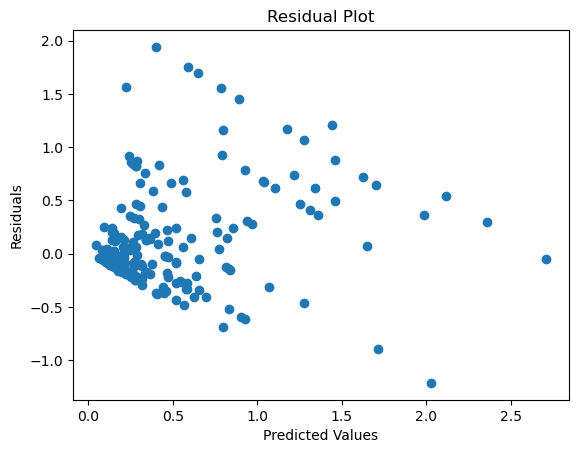

In [73]:
residuals = y_test - predictions.flatten()
plt.scatter(predictions, residuals)
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()
